# Genetic Linear Regression with Numpy
A solution... via evolution!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_num = 10
beta_true = [0, 1]
x_obs = np.random.normal(25, 10, sample_num)
y_obs = beta_true[0] + beta_true[1]*x_obs + np.random.normal(x_obs, 2, sample_num)

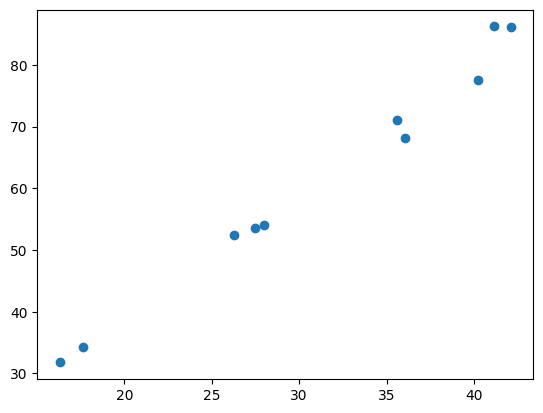

In [3]:
plt.scatter(x_obs, y_obs);

In [4]:
def rmse_fitness(beta):
    y_hat = beta[0] + x_obs*beta[1]
    rmse = np.sqrt(np.mean((y_hat - y_obs)**2))
    return rmse

In [5]:
def rank(betas, rmse_fitness):
    scored = np.column_stack((betas, np.apply_along_axis(rmse_fitness, axis=1, arr=betas))) 
    ranked = scored[scored[:, 2].argsort()]
    return ranked

In [6]:
def select(ranked, frac):
    top_num = int(frac*ranked.shape[0])
    survivors = ranked[:top_num]
    return survivors

In [7]:
def mate(survivors, gen_size):    
    rank_weighting = np.linspace(1, 0, survivors.shape[0])
    rank_weighting /= rank_weighting.sum()

    sampled_b0 = np.random.choice(survivors[:,0], size=gen_size, replace=True, p=rank_weighting)
    sampled_b1 = np.random.choice(survivors[:,1], size=gen_size, replace=True, p=rank_weighting)
    sampled_betas = np.column_stack((sampled_b0, sampled_b1))

    # mutation
    mutation = np.random.normal(0, 1, (gen_size, 2))
    
    # next generation
    new_betas = sampled_betas + mutation

    return new_betas

In [8]:
beta = np.random.normal(-10,10, 2)
beta

array([ -5.78270198, -12.67995893])

In [9]:
rmse_fitness([  18.54413807,   3.36654949])

np.float64(62.760407382689046)

In [10]:
gen_size = 10
betas = np.random.normal(0, 10, (gen_size, 2))
betas

array([[-11.12559268,  -3.90979977],
       [ -0.48278203,   7.25416838],
       [ 12.1620009 ,   2.43479091],
       [-14.60013454,   6.64198884],
       [  1.48915176, -16.78413933],
       [ 11.7020796 ,   4.32842258],
       [-12.62569567,   8.36560037],
       [  7.40320533,   9.03608065],
       [ -6.08023047,  -3.55780223],
       [ -0.32130286,  -7.02800311]])

In [11]:
ranked = rank(betas, rmse_fitness)
ranked

array([[ 1.21620009e+01,  2.43479091e+00,  2.65852528e+01],
       [ 1.17020796e+01,  4.32842258e+00,  8.70966453e+01],
       [-1.46001345e+01,  6.64198884e+00,  1.36573305e+02],
       [-4.82782031e-01,  7.25416838e+00,  1.69897495e+02],
       [-6.08023047e+00, -3.55780223e+00,  1.85151481e+02],
       [-1.26256957e+01,  8.36560037e+00,  1.94184797e+02],
       [-1.11255927e+01, -3.90979977e+00,  2.01394176e+02],
       [ 7.40320533e+00,  9.03608065e+00,  2.35113138e+02],
       [-3.21302855e-01, -7.02800311e+00,  2.91830681e+02],
       [ 1.48915176e+00, -1.67841393e+01,  6.05584191e+02]])

In [12]:
survivors = select(ranked, 0.2)
survivors

array([[12.1620009 ,  2.43479091, 26.58525277],
       [11.7020796 ,  4.32842258, 87.09664534]])

In [13]:
sampling_weights = np.linspace(1, 0, survivors.shape[0])
sampling_weights /= sampling_weights.sum()
sampling_weights

array([1., 0.])

In [14]:
np.random.normal(survivors[0,0], 3, 5)

array([13.90677542, 13.29266291, 11.69026064, 15.03191077, 14.30192913])

In [15]:
gen_size = 100
betas = np.random.uniform(-1, 1, (gen_size, 2))
best_fit = []
verbose = True
for gen in range(5):
    if verbose:
        print(f"Generation: {gen}")
    
    # ranking
    ranked = rank(betas, rmse_fitness)
    best_fit.append(ranked[0][2])
    
    # selection
    survivors = select(ranked, 0.2)
    
    if verbose:
        print(f"survivors:\n {survivors}")
    
    # crossover and mutation -> next generation
    betas = mate(survivors, gen_size)

    if verbose:
        print(f"next betas: \n {betas[:10]}")
        print('\n')

# print(betas[:10])


Generation: 0
survivors:
 [[ 7.84799373e-01  9.88455055e-01  3.16031515e+01]
 [-6.39179674e-01  9.48326066e-01  3.42545032e+01]
 [-6.14357938e-01  9.31025547e-01  3.47891853e+01]
 [-5.71126748e-01  9.23044934e-01  3.50054938e+01]
 [-3.20214880e-01  8.95983028e-01  3.56394617e+01]
 [-8.70594791e-01  8.99892446e-01  3.60389174e+01]
 [ 3.40086201e-01  7.94970048e-01  3.82703183e+01]
 [ 7.07519646e-01  7.54077815e-01  3.92401875e+01]
 [-8.07288995e-01  7.81802399e-01  3.97911501e+01]
 [-6.57767024e-01  7.61006338e-01  4.03197308e+01]
 [-3.91922795e-01  6.89306843e-01  4.23810767e+01]
 [-2.32430914e-01  6.74278916e-01  4.27139878e+01]
 [-3.45855673e-01  6.77354431e-01  4.27230619e+01]
 [ 9.25041083e-01  6.17466505e-01  4.34438248e+01]
 [-2.12815814e-02  6.27087341e-01  4.40363797e+01]
 [ 5.41541267e-01  6.06698065e-01  4.41574419e+01]
 [-3.13980449e-01  6.28665292e-01  4.42651497e+01]
 [ 6.82534499e-01  5.88152561e-01  4.46218386e+01]
 [ 6.57622859e-01  5.88630904e-01  4.46301620e+01]
 [ 6.

In [16]:
best_fit

[np.float64(31.603151544600312),
 np.float64(2.472210003414198),
 np.float64(2.155931078799534),
 np.float64(2.29279076605474),
 np.float64(2.423826250467407)]